In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = 'bank-additional-full.csv'
df = pd.read_csv(file, sep = ';')


In [2]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [3]:
df.groupby('y').count()
# Number of success is very low compared to failures. 36548 = 0 and 4640 = 1
# columns have missing values of unknown or nonexistent values.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


In [4]:
#check for missing values 
print(df.info())
df.isnull().any().any()

#No values are missing. No steps were taken to fill missing values. There are however, 'unknown' categories within variables
#which may need to be addressed later on. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

False

In [5]:
#job marital unknown

df_unknown_job = df[df.job == 'unknown']
print(df['job'].value_counts(dropna=False))
print(df['marital'].value_counts(dropna=False))
print(df['education'].value_counts(dropna=False))

print(df_unknown_job)

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
       age      job   marital            education  default  housing     loan  \
29      55  unknown   married    university.degree  unknown  unknown  unknown   
35      55  unknown   married             basic.4y  unknown      yes       no   
73      57  unknown   married              unknown  unknown       no       no   
91      57  un

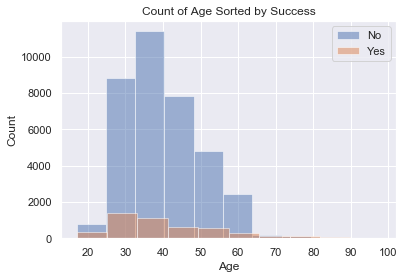

In [6]:
sns.set(style = 'darkgrid')
yes = df[df['y'] == 'yes']
no = df[df['y'] == 'no']
ax = plt. hist(x = 'age', alpha = 0.5, data = no)
ax = plt.hist(x = 'age', alpha = 0.5, data = yes)
ax = plt.title('Count of Age Sorted by Success')
ax = plt.legend(['No', 'Yes'])
ax = plt.xlabel('Age')
ax = plt.ylabel('Count')
plt.show()

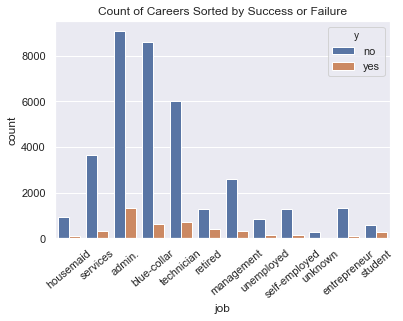

In [7]:
#early data analysis 
ax = sns.countplot(x = 'job', hue = 'y', data = df)
ax.set_title('Count of Careers Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
plt.show()

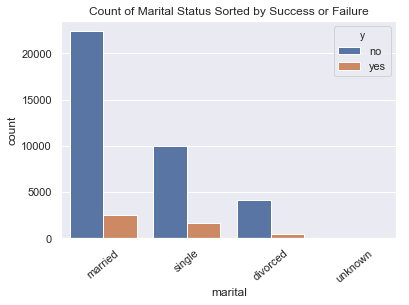

In [8]:
ax = sns.countplot(x = 'marital', hue = 'y', data = df)
ax.set_title('Count of Marital Status Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
plt.show()

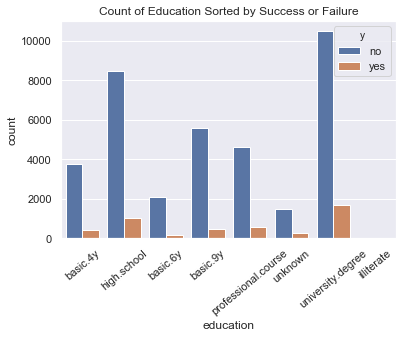

In [9]:
ax = sns.countplot(x = 'education', hue = 'y', data = df)
ax.set_title('Count of Education Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
plt.show()

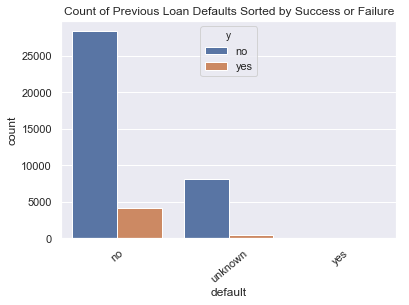

In [10]:
ax = sns.countplot(x = 'default', hue = 'y', data = df)
ax.set_title('Count of Previous Loan Defaults Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
plt.show()

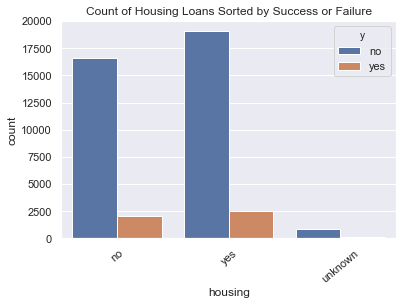

In [11]:
ax = sns.countplot(x = 'housing', hue = 'y', data = df)
ax.set_title('Count of Housing Loans Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
plt.show()

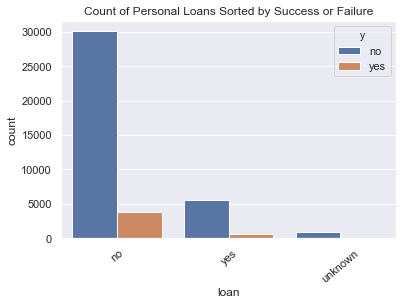

In [12]:
ax = sns.countplot(x = 'loan', hue = 'y', data = df)
ax.set_title('Count of Personal Loans Sorted by Success or Failure')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
plt.show()

In [13]:
#perform correlation test

In [17]:
#apply machine learning 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

#encode categories to numerical labels for machine learning
categories = df.select_dtypes(include = 'object')
categories.info()
le = preprocessing.LabelEncoder()

categories = categories.apply(le.fit_transform)
categories.info()

others = df.select_dtypes(exclude = 'object')
data = categories.add(others, fill_value=0)
data.info()

testdata = data.drop(['y', 'duration'], axis = 1)
target = data['y']
print(testdata.shape, target.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
job            41188 non-null object
marital        41188 non-null object
education      41188 non-null object
default        41188 non-null object
housing        41188 non-null object
loan           41188 non-null object
contact        41188 non-null object
month          41188 non-null object
day_of_week    41188 non-null object
poutcome       41188 non-null object
y              41188 non-null object
dtypes: object(11)
memory usage: 3.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
job            41188 non-null int32
marital        41188 non-null int32
education      41188 non-null int32
default        41188 non-null int32
housing        41188 non-null int32
loan           41188 non-null int32
contact        41188 non-null int32
month          41188 non-null int32
day_of_week    41188 non-null int32
poutcome  

In [16]:
clf = RandomForestClassifier()
scores = cross_val_score(clf, testdata, target, cv=3)
scores.mean()

C:\Users\xuanx\Miniconda2\envs\newenv3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\xuanx\Miniconda2\envs\newenv3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\xuanx\Miniconda2\envs\newenv3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.36643121788788213

In [15]:
#refine variables 
testdata1 = testdata.drop(['emp.var.rate', 'cons.price.idx', 
                           'cons.conf.idx', 'euribor3m', 'nr.employed'], 
                          axis = 1)
target = data['y']
print(testdata1.shape, target.shape)

clf = RandomForestClassifier()
scores = cross_val_score(clf, testdata1, target, cv=3)
scores.mean()

(41188, 14) (41188,)


C:\Users\xuanx\Miniconda2\envs\newenv3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\xuanx\Miniconda2\envs\newenv3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\xuanx\Miniconda2\envs\newenv3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5442960050389037